In [1]:
import librosa
import librosa.display
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

import numpy as np
import IPython.display as ipd

In [2]:
y,sr = librosa.load('zero.wav')

In [3]:
print('Data :%s' % y)
print('Sample Rate : %s' % sr)

Data :[-0.01095867 -0.01327632 -0.01378769 ...  0.00736098  0.00378776
  0.        ]
Sample Rate : 22050


In [4]:
tempo, beats_frame = librosa.beat.beat_track(y=y,sr=sr)

In [5]:
print('Tempo :%s' % tempo)
print('Beats : %s' % beats_frame)

Tempo :198.76802884615384
Beats : [3]


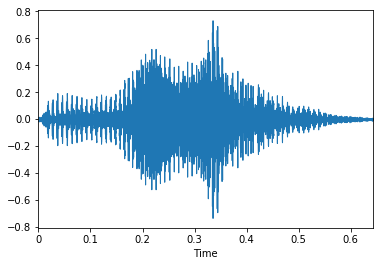

In [6]:
librosa.display.waveplot(y,sr) #wave plot for word zero

In [7]:
#Visualization

In [8]:
ipd.Audio('zero.wav')

In [9]:
#harmonic and #percussive
harmonic, percussive = librosa.effects.hpss(y)

In [10]:
print('Harmonic :%s' % harmonic)
print('Percussive : %s' % percussive)

Harmonic :[-9.3195027e-05 -3.7497276e-04 -7.2947307e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
Percussive : [-0.01086548 -0.01290135 -0.01305822 ...  0.          0.
  0.        ]


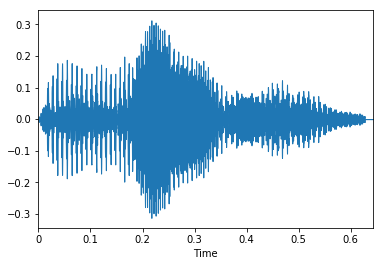

In [11]:
librosa.display.waveplot(harmonic)

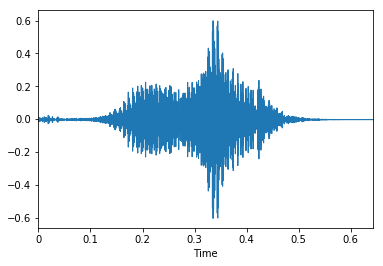

In [12]:
librosa.display.waveplot(percussive)

In [13]:
#mel
mfcc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13)

In [42]:
mfcc.shape

(13, 28)

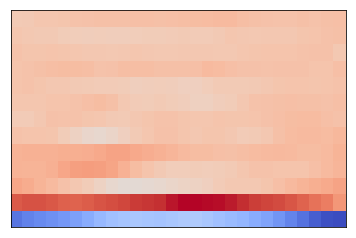

In [14]:
librosa.display.specshow(mfcc)

In [15]:
S = librosa.feature.melspectrogram(y,sr=sr,n_mels=128)

In [16]:
log_S = librosa.power_to_db(S, ref=np.max)

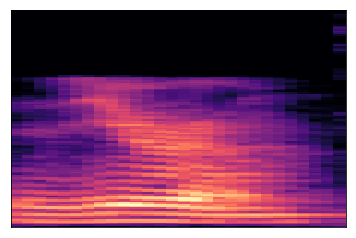

In [17]:
librosa.display.specshow(log_S,sr=sr)

In [41]:
log_S.shape

(128, 28)

In [18]:
#log_spectogram
def log_spectogram(audio,window_size=5,step_size=2,eps=1e-10):
    data, sample_rate = librosa.load(audio)
    n_per_seg = int(round(window_size*sample_rate/1e3))
    n_overlap = int(round(step_size*sample_rate/1e3))
    freq,times,spec = signal.spectrogram(data,fs=sample_rate,window="hann",nperseg=n_per_seg,noverlap=n_overlap,detrend=False)
    
    return freq,times,np.log(spec.T.astype(np.float32)+eps)

In [19]:
freq, time, spec = log_spectogram('zero.wav')

In [54]:
np.array(spec)

array([[-15.485712 , -15.073425 , -17.095758 , ..., -23.02585  ,
        -23.02585  , -23.02585  ],
       [-18.898493 , -14.48839  , -16.630713 , ..., -23.02585  ,
        -23.02585  , -23.02585  ],
       [-16.183588 , -12.825959 , -13.8817625, ..., -23.02585  ,
        -23.02585  , -23.02585  ],
       ...,
       [-16.53044  , -15.930704 , -17.447933 , ..., -23.024973 ,
        -23.025135 , -23.025536 ],
       [-20.053165 , -17.91913  , -18.554144 , ..., -23.006826 ,
        -23.019476 , -23.011745 ],
       [-20.200623 , -17.106325 , -18.730318 , ..., -22.851868 ,
        -23.024685 , -23.025845 ]], dtype=float32)

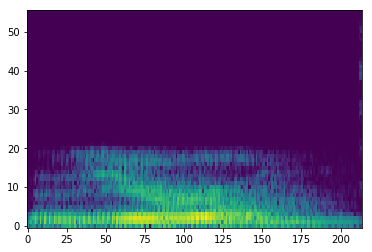

In [20]:
plt.imshow(spec.T,aspect="auto",origin="lower")

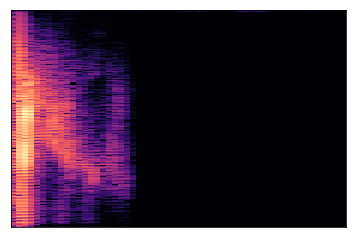

In [21]:
librosa.display.specshow(spec)

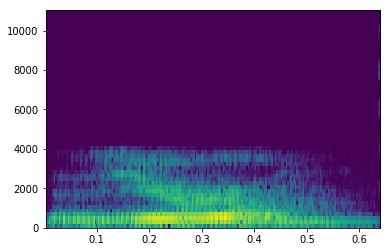

In [22]:
plt.imshow(spec.T,aspect="auto",origin="lower",extent=[time.min(), time.max(), freq.min(), freq.max()])

In [23]:
harmonic_spec = librosa.feature.mfcc(harmonic)

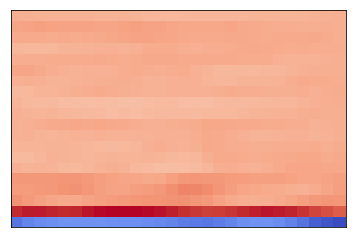

In [24]:
librosa.display.specshow(harmonic_spec)

In [25]:
percussive_spec = librosa.feature.mfcc(percussive)

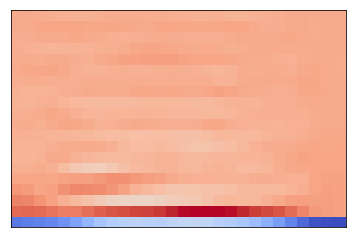

In [26]:
librosa.display.specshow(percussive_spec)

In [27]:
print("Length of the feature is :",len(spec))

Length of the feature is : 214


In [28]:
spec.shape

(214, 56)

In [31]:
S= np.abs(librosa.stft(y))
S *= 2

In [33]:
S = librosa.feature.melspectrogram(S=S)

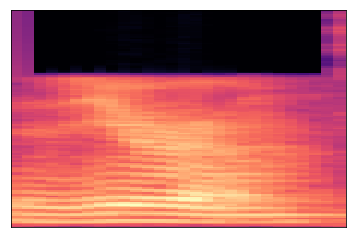

In [40]:
librosa.display.specshow(librosa.power_to_db(S,ref=np.min),fmax=14000)

In [43]:
autocor = librosa.autocorrelate(y)

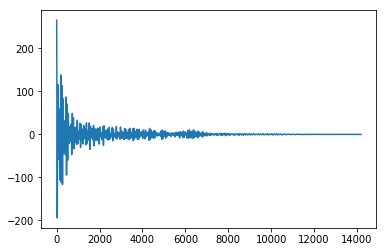

In [47]:
plt.plot(autocor)#used to find if the audio has any repeated sound